In [1]:
# Load the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Load the data. 
# Datos del GPS clean

df = pd.read_excel('C:/Users/ferbm/Desktop/Rayados/GPS_clean.xlsx')

In [3]:
df.info()
df.describe()
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1728 non-null   int64         
 1   Player             1728 non-null   object        
 2   Date               1728 non-null   datetime64[ns]
 3   Distance(m)        1728 non-null   float64       
 4   Dist (m/min)       1728 non-null   float64       
 5   HMLD (m)           1728 non-null   float64       
 6   % ALTA INTENSIDAD  1728 non-null   float64       
 7   Distance Acc(m)    1728 non-null   float64       
 8   Distance Dec(m)    1728 non-null   float64       
 9   HSR Abs Dist (m)   1728 non-null   float64       
 10  HSR Abs (m/min)    1728 non-null   float64       
 11  Sprint Abs(m)      1728 non-null   float64       
 12  Sprints ABS        1728 non-null   float64       
 13  MAX Speed(km/h)    1728 non-null   float64       
 14  Step Bal

In [4]:
#df = df.drop(['Unnamed: 0'], axis=1)
#df.head()

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].describe()

<ipython-input-5-5f11509aa1df>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date'].describe()


count                    1728
unique                    111
top       2021-07-01 00:00:00
freq                       24
first     2021-07-01 00:00:00
last      2021-11-11 00:00:00
Name: Date, dtype: object

In [6]:
data_day = df['Date'].value_counts().rename_axis('Date').reset_index(name='counts')
data_day = data_day.sort_values(by=['Date'])
data_day

,Date,counts
0,2021-07-01,24
30,2021-07-03,19
39,2021-07-04,18
109,2021-07-05,1
40,2021-07-07,18
...,...,...
9,2021-11-05,21
75,2021-11-06,14
102,2021-11-09,9
104,2021-11-10,8


# Calendar visualization of Training Occurrence

In [7]:
ts = pd.date_range('07/1/2021', periods = 134) # year data, sum up 134 days
ts = pd.Series(ts).apply(str) # convert Datetime into string
new = ts.str.split(" ", n = 1, expand = True) # extract YYYY-MM-DD date 
ts = new[0]
ts

0      2021-07-01
1      2021-07-02
2      2021-07-03
3      2021-07-04
4      2021-07-05
          ...    
129    2021-11-07
130    2021-11-08
131    2021-11-09
132    2021-11-10
133    2021-11-11
Name: 0, Length: 134, dtype: object

In [8]:
year = ts.apply(lambda x: int(x[0:4]))
month = ts.apply(lambda x: int(x[5:7])) # slicing month from YYYY-MM-DD format
mday = ts.apply(lambda x: int(x[8:10]))


def week_day(date):
    '''generate week days from YYYY-MM-DD format'''
    year, month, day = (int(x) for x in date.split('-'))   
    answer = dt.date(year, month, day).weekday() 
    answer = int(answer) + 1
    return answer

weekdays = ts.apply(week_day)
weekdays

0      4
1      5
2      6
3      7
4      1
      ..
129    7
130    1
131    2
132    3
133    4
Name: 0, Length: 134, dtype: int64

In [9]:
calendar = pd.DataFrame({'Date': ts, 'weekdays':weekdays,
              'mday':mday,'month': month, 'year':year
              #'counts': np.nan
                        }) # val is random numbers

num_weekdays = {1:'Mon',2:'Tue',3: 'Wed',4:'Thu',5 :'Fri',6:'Sat', 7 : 'Sun'} # map between number and weekdays
num_mont = {1:'Jan',2:'Feb',3:'Mar',4:'Apr', 5: 'May',6:'Jun', 7:'Jul', 8:'Aug',
            9:'Sep',10:'Oct',11:'Nov', 12:'Dec'}

calendar['weekdays'] = calendar['weekdays'].map(num_weekdays)
calendar['month'] = calendar['month'].map(num_mont)

calendar

,Date,weekdays,mday,month,year
0,2021-07-01,Thu,1,Jul,2021
1,2021-07-02,Fri,2,Jul,2021
2,2021-07-03,Sat,3,Jul,2021
3,2021-07-04,Sun,4,Jul,2021
4,2021-07-05,Mon,5,Jul,2021
...,...,...,...,...,...
129,2021-11-07,Sun,7,Nov,2021
130,2021-11-08,Mon,8,Nov,2021
131,2021-11-09,Tue,9,Nov,2021
132,2021-11-10,Wed,10,Nov,2021


In [10]:
calendar['Date']=pd.to_datetime(calendar['Date'])
calendar['Date'].describe()

<ipython-input-10-fc8b25e9b5f0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  calendar['Date'].describe()


count                     134
unique                    134
top       2021-07-01 00:00:00
freq                        1
first     2021-07-01 00:00:00
last      2021-11-11 00:00:00
Name: Date, dtype: object

In [11]:
# Merge df into data dataset
new_calendar = pd.merge(calendar, data_day, on='Date')
display(new_calendar)

,Date,weekdays,mday,month,year,counts
0,2021-07-01,Thu,1,Jul,2021,24
1,2021-07-03,Sat,3,Jul,2021,19
2,2021-07-04,Sun,4,Jul,2021,18
3,2021-07-05,Mon,5,Jul,2021,1
4,2021-07-07,Wed,7,Jul,2021,18
...,...,...,...,...,...,...
106,2021-11-05,Fri,5,Nov,2021,21
107,2021-11-06,Sat,6,Nov,2021,14
108,2021-11-09,Tue,9,Nov,2021,9
109,2021-11-10,Wed,10,Nov,2021,8


In [12]:
new_calendar['Date'] = pd.Series(new_calendar['Date']).apply(str) # convert Datetime into string
new = new_calendar['Date'].str.split(" ", n = 1, expand = True) # extract YYYY-MM-DD date 
new_calendar['Date'] = new[0]
new_calendar['Date']

0      2021-07-01
1      2021-07-03
2      2021-07-04
3      2021-07-05
4      2021-07-07
          ...    
106    2021-11-05
107    2021-11-06
108    2021-11-09
109    2021-11-10
110    2021-11-11
Name: Date, Length: 111, dtype: object

In [13]:
from math import ceil

wdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] # set factor order level
wdays.reverse() # order reverse 
mont = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']

def recode_ordered(array,level):
    '''recode string data to ordered factors
    '''
    cate = pd.api.types.CategoricalDtype(categories=level, ordered= True)
    array = array.astype(cate)
    return array

new_calendar['month'] = recode_ordered(new_calendar['month'], mont)
new_calendar['weekdays'] = recode_ordered(new_calendar['weekdays'], wdays)

def week_of_month(date):
    '''Returns the week of the month for the specified date.
    '''
    year, month, day = (int(x) for x in date.split('-'))   
    dt1 = dt.date(year, month, day)
    first_day = dt1.replace(day=1)
    adjusted_dom = dt1.day + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))

new_calendar['monthweek'] =  new_calendar['Date'].apply(week_of_month)
new_calendar.to_csv('df.csv', index=False, header=True)
new_calendar

,Date,weekdays,mday,month,year,counts,monthweek
0,2021-07-01,Thu,1,Jul,2021,24,1
1,2021-07-03,Sat,3,Jul,2021,19,1
2,2021-07-04,Sun,4,Jul,2021,18,1
3,2021-07-05,Mon,5,Jul,2021,1,2
4,2021-07-07,Wed,7,Jul,2021,18,2
...,...,...,...,...,...,...,...
106,2021-11-05,Fri,5,Nov,2021,21,1
107,2021-11-06,Sat,6,Nov,2021,14,1
108,2021-11-09,Tue,9,Nov,2021,9,2
109,2021-11-10,Wed,10,Nov,2021,8,2


In [14]:
from plotnine import * # use python's ggplot2

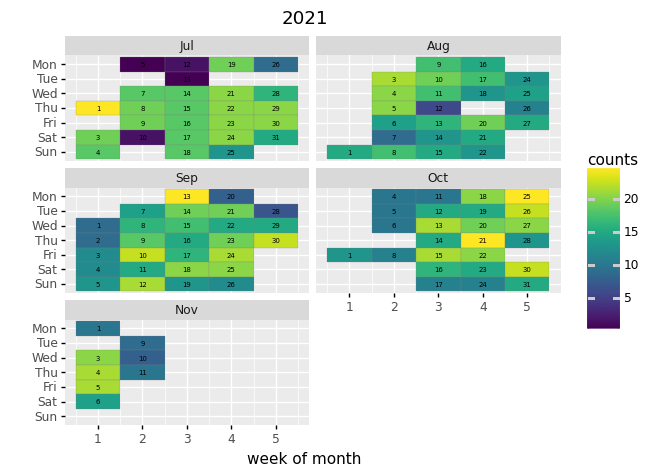

<ggplot: (204529790660)>

In [15]:
# 2021
calendar2021 = new_calendar[new_calendar['year']==2021]

(ggplot(calendar2021, aes('monthweek','weekdays', fill = 'counts')) +
  geom_tile(color ='gray') +
  geom_text(aes(label = 'mday'),size=5,color = 'black')+
  facet_wrap('~month' ,nrow=3) +
  labs(title = '2021',x='week of month',y = ' ',fill = 'counts') + 
  scale_x_continuous() 
)